# Flights Data Exploration Challenge

In this challenge, you'll explore a real-world dataset containing flights data from the US Department of Transportation.

Let's start by loading and viewing the data.

removing any null rows

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

df_flights = pd.read_csv('flights.csv')
df_flights = pd.DataFrame(df_flights)

print(df_flights.shape)
df_flights = df_flights.dropna(axis=0, how='any')
print(df_flights.shape)

print(df_flights.dtypes)



(271940, 20)
(269179, 20)
Year                   int64
Month                  int64
DayofMonth             int64
DayOfWeek              int64
Carrier               object
OriginAirportID        int64
OriginAirportName     object
OriginCity            object
OriginState           object
DestAirportID          int64
DestAirportName       object
DestCity              object
DestState             object
CRSDepTime             int64
DepDelay               int64
DepDel15             float64
CRSArrTime             int64
ArrDelay               int64
ArrDel15               int64
Cancelled              int64
dtype: object


skim checking the data and dropping any outliers

In [2]:
mindelay = -900
maxdelay = 900

outliers = df_flights.query(f'(DepDelay>{maxdelay} | DepDelay < {mindelay}) | (ArrDelay > {maxdelay} | ArrDelay < {mindelay})')
print(outliers.shape)
print(outliers)

print(df_flights.shape)
df_flights = df_flights.drop(outliers.index)
df_flights.shape

(12, 20)
        Year  Month  DayofMonth  DayOfWeek Carrier  OriginAirportID  \
6537    2013      6          17          1      MQ            10821   
14320   2013      6          30          7      MQ            12451   
32883   2013      4           1          1      AA            13871   
95648   2013      4          19          5      HA            12892   
121919  2013      4          17          3      AA            14492   
180503  2013      4           3          3      AA            10397   
214288  2013      6           7          5      MQ            13931   
221784  2013      5          31          5      MQ            10693   
241527  2013     10          18          5      AA            14679   
251813  2013      7           2          2      AA            12889   
253058  2013      6          28          5      AA            11278   
255631  2013      6          17          1      AA            14771   

                                        OriginAirportName      Orig

(269167, 20)

summary and visualisation of data

Minimum:-63.00
Mean:10.40
Median:-1.00
Mode:-3.00
Maximum:865.00



C:\Users\billg\AppData\Local\Temp\ipykernel_14268\3811281340.py:40: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


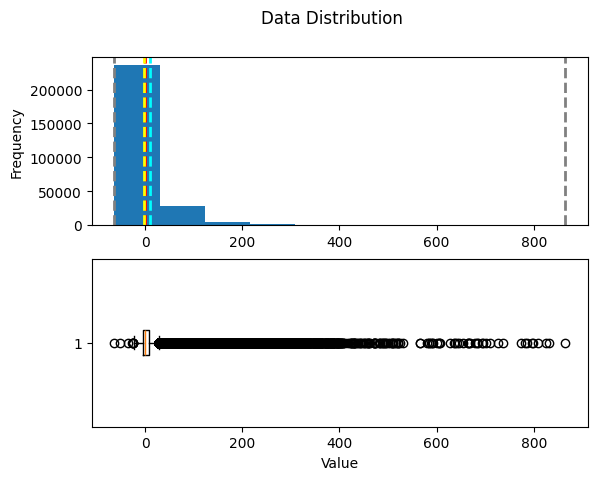

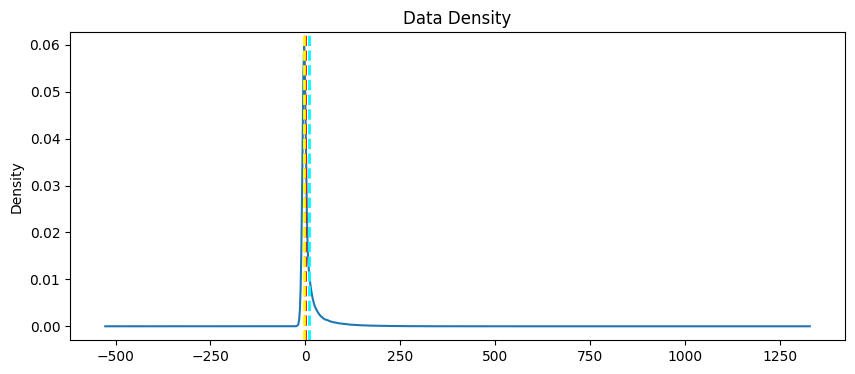

Minimum:-75.00
Mean:6.51
Median:-3.00
Mode:-7.00
Maximum:852.00



C:\Users\billg\AppData\Local\Temp\ipykernel_14268\3811281340.py:40: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


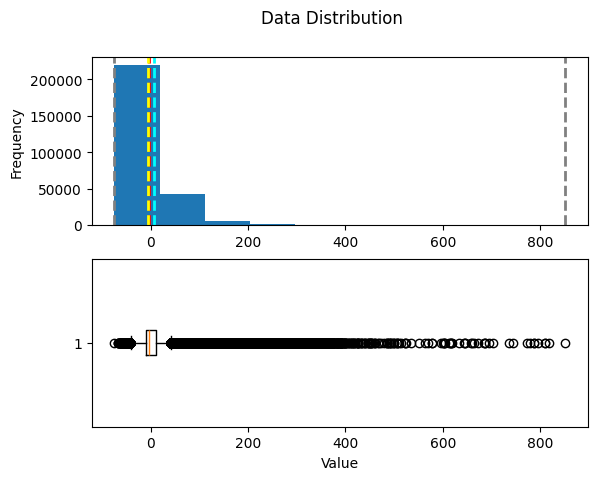

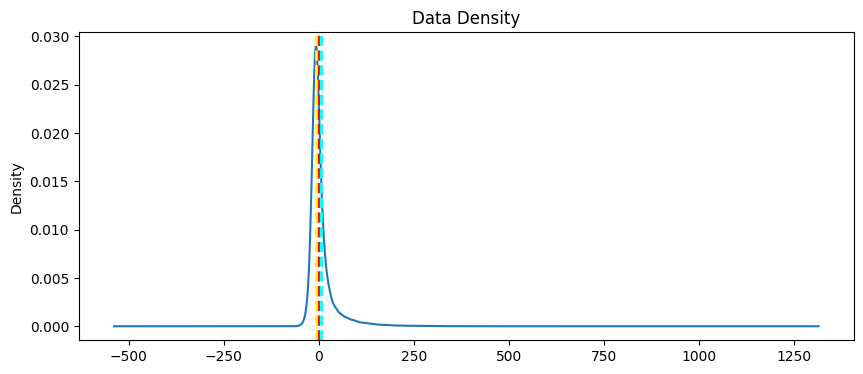

In [3]:
def show_distribution(var_data):
    '''
    This function will make a distribution (graph) and display it
    '''

    # Get statistics
    min_val = var_data.min()
    max_val = var_data.max()
    mean_val = var_data.mean()
    med_val = var_data.median()
    mod_val = var_data.mode()[0]

    print('Minimum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMaximum:{:.2f}\n'.format(min_val,
                                                                                            mean_val,
                                                                                            med_val,
                                                                                            mod_val,
                                                                                            max_val))

    # Create a figure for 2 subplots (2 rows, 1 column)
    fig, ax = plt.subplots(2, 1)
    # Plot the histogram   
    ax[0].hist(var_data)
    ax[0].set_ylabel('Frequency')

    # Add lines for the mean, median, and mode
    ax[0].axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2)

    # Plot the boxplot   
    ax[1].boxplot(var_data, vert=False)
    ax[1].set_xlabel('Value')

    # Add a title to the Figure
    fig.suptitle('Data Distribution')

    # Show the figure
    fig.show()



def show_density(var_data):
    fig = plt.figure(figsize=(10,4))

    # Plot density
    var_data.plot.density()

    # Add titles and labels
    plt.title('Data Density')

    # Show the mean, median, and mode
    plt.axvline(x=var_data.mean(), color = 'cyan', linestyle='dashed', linewidth = 2)
    plt.axvline(x=var_data.median(), color = 'red', linestyle='dashed', linewidth = 2)
    plt.axvline(x=var_data.mode()[0], color = 'yellow', linestyle='dashed', linewidth = 2)

    # Show the figure
    plt.show()

show_distribution(df_flights.DepDelay)
show_density(df_flights.DepDelay)


show_distribution(df_flights.ArrDelay)
show_density(df_flights.ArrDelay)

delays grouped by Carrier

In [4]:
print(df_flights.groupby(df_flights.Carrier)[["DepDelay"]].mean().sort_values("DepDelay"))
df_flights.groupby(df_flights.Carrier)[["ArrDelay"]].mean().sort_values("ArrDelay")


          DepDelay
Carrier           
AS        0.713122
HA        0.719233
US        4.955968
DL        7.144951
OO        7.748681
YV        8.953606
9E        9.940683
FL       10.621714
F9       10.897595
AA       11.955309
UA       12.360214
WN       12.678309
B6       12.749757
VX       14.136106
EV       14.414058
MQ       14.972730


,ArrDelay
Carrier,
AS,-0.129887
HA,0.820458
DL,2.420039
US,4.040999
UA,4.885221
9E,5.256995
OO,6.153706
AA,7.063615
FL,7.662590


Delays grouped by day of the week

In [5]:
df_flights.groupby(df_flights.DayOfWeek)[["ArrDelay"]].mean().sort_values("ArrDelay")

,ArrDelay
DayOfWeek,
6,2.152108
2,4.293584
7,4.972470
1,6.784885
3,7.022472
5,8.478716
4,10.827256


Departure delay grouped by airport

In [6]:
display(df_flights.groupby(df_flights.OriginAirportID)[["DepDelay"]].mean().sort_values("DepDelay"))

df_flights.query("OriginAirportID == 13930")

,DepDelay
OriginAirportID,
10299,2.221925
13830,2.305410
12954,4.321770
15376,4.672694
14869,4.990350
...,...
12478,14.047801
11618,14.203831
11298,14.492855


,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
3,2013,7,22,1,OO,13930,Chicago O'Hare International,Chicago,IL,11042,Cleveland-Hopkins International,Cleveland,OH,804,35,1.0,1027,33,1,0
8,2013,10,8,2,AA,13930,Chicago O'Hare International,Chicago,IL,11298,Dallas/Fort Worth International,Dallas/Fort Worth,TX,1010,8,0.0,1240,-10,0,0
47,2013,7,25,4,MQ,13930,Chicago O'Hare International,Chicago,IL,12451,Jacksonville International,Jacksonville,FL,1245,-1,0.0,1605,7,0,0
148,2013,5,17,5,AA,13930,Chicago O'Hare International,Chicago,IL,15016,Lambert-St. Louis International,St. Louis,MO,1720,-1,0.0,1830,1,0,0
149,2013,5,29,3,AA,13930,Chicago O'Hare International,Chicago,IL,11298,Dallas/Fort Worth International,Dallas/Fort Worth,TX,740,-6,0.0,1010,-21,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271837,2013,6,12,3,AA,13930,Chicago O'Hare International,Chicago,IL,15016,Lambert-St. Louis International,St. Louis,MO,1205,3,0.0,1310,6,0,0
271852,2013,4,21,7,EV,13930,Chicago O'Hare International,Chicago,IL,11057,Charlotte Douglas International,Charlotte,NC,1110,-7,0.0,1403,-6,0,0
271861,2013,9,26,4,UA,13930,Chicago O'Hare International,Chicago,IL,11292,Denver International,Denver,CO,545,-5,0.0,720,-11,0,0
271919,2013,5,6,1,MQ,13930,Chicago O'Hare International,Chicago,IL,10693,Nashville International,Nashville,TN,1655,0,0.0,1820,-4,0,0


Answers:

mean(departure time): 10.40
mean(arrival time): 6.51

flights with AS carrier seems to have the least delay infact arriving early by 0.13 minute
flights with MQ carrier has the most delay of 13.34 minutes

flights on a Saturday tend to have less delays on average(2.152108), whereas flights on a Thursday have the most delays(10.827256). So there isn't much noticable difference

Chicago O'Hare International is the aiport with the highert departure delay

Correlation late departure and late arrival

On-time Departures:16521
Delayed Departures:111759
0.9545551003011256


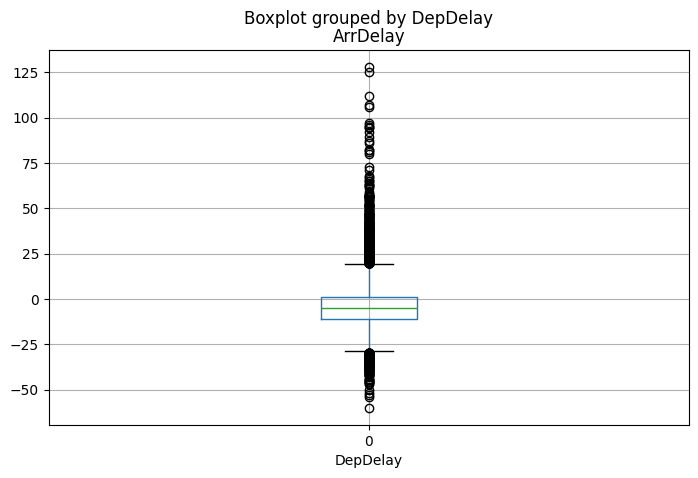

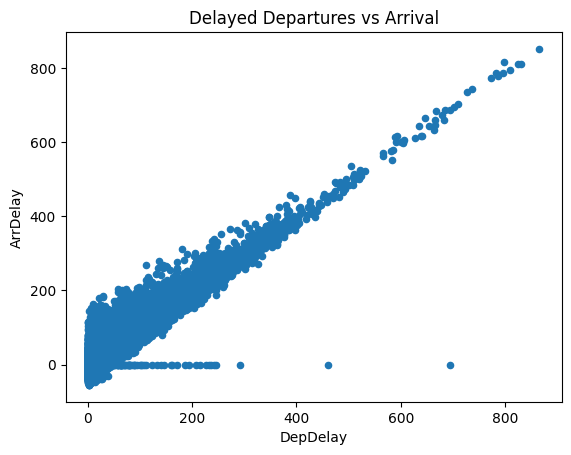

In [27]:
onTimeDepartures = df_flights.query("DepDelay == 0")
print(f"On-time Departures:{onTimeDepartures.DepDelay.count()}")
delayedDepartures = df_flights.query("DepDelay > 0")
print(f"Delayed Departures:{delayedDepartures.DepDelay.count()}")

onTimeDepartures.boxplot(column='ArrDelay', by='DepDelay', figsize=(8,5))
delayedDepartures.plot.scatter(title='Delayed Departures vs Arrival', x='DepDelay', y='ArrDelay')
print(delayedDepartures.DepDelay.corr(delayedDepartures.ArrDelay))



In [94]:
lateArrivals = df_flights.query("ArrDelay > 0")
lateArrivals = lateArrivals[["OriginAirportID", "DestAirportID", "ArrDelay"]]
pd.set_option("display.max_rows", None)

lateArrivals.groupby(["OriginAirportID", "DestAirportID"]).count().sort_values(by="ArrDelay", ascending=False)

df_flights.query("(OriginAirportID == 12892 and DestAirportID == 14771)").iloc[0]


Year                                        2013
Month                                          4
DayofMonth                                    21
DayOfWeek                                      7
Carrier                                       WN
OriginAirportID                            12892
OriginAirportName      Los Angeles International
OriginCity                           Los Angeles
OriginState                                   CA
DestAirportID                              14771
DestAirportName      San Francisco International
DestCity                           San Francisco
DestState                                     CA
CRSDepTime                                   850
DepDelay                                      45
DepDel15                                     1.0
CRSArrTime                                  1010
ArrDelay                                      31
ArrDel15                                       1
Cancelled                                      0
Name: 564, dtype: ob

In [110]:
lateArrivals.groupby(["OriginAirportID", "DestAirportID"]).mean().sort_values(by="ArrDelay", ascending=False)

#only 1 data point
lateArrivals.query("(OriginAirportID == 10529 and DestAirportID == 12892)").sort_values(by="ArrDelay", ascending=False)


,OriginAirportID,DestAirportID,ArrDelay
111082,10529,12892,225


mean(Departure Delay): 10.40
mean(Arrival Delay):6.51

AS is the carrier with the least departure delays and least arrival delays
MQ is the carrier with the most departure delays and least arrival delays

Saturday is the day with the least arrival delays with 2.152108 minutes
Thursday is the day with the most arrival delays with 10.827256 minutes
So yes, there is a noticable difference

Chicago O'Hare International is the airport with the highest average departure delay.

Around 75% of flights that departed on time arrived before arrival time or a few minutes after arrival time.

With a strong corelation of 0.9545 for delayed departures, it does result in longer delayed arrivals.

Los Angeles International to San Francisco International was the route with the most late arrivals.

Bradley International to Los Angeles International has the highest average arrival delay of 225 minutes. Although there is one one data point for these airports.





The dataset contains observations of US domestic flights in 2013, and consists of the following fields:

- **Year**: The year of the flight (all records are from 2013)
- **Month**: The month of the flight
- **DayofMonth**: The day of the month on which the flight departed
- **DayOfWeek**: The day of the week on which the flight departed - from 1 (Monday) to 7 (Sunday)
- **Carrier**: The two-letter abbreviation for the airline.
- **OriginAirportID**: A unique numeric identifier for the departure aiport
- **OriginAirportName**: The full name of the departure airport
- **OriginCity**: The departure airport city
- **OriginState**: The departure airport state
- **DestAirportID**: A unique numeric identifier for the destination aiport
- **DestAirportName**: The full name of the destination airport
- **DestCity**: The destination airport city
- **DestState**: The destination airport state
- **CRSDepTime**: The scheduled departure time
- **DepDelay**: The number of minutes departure was delayed (flight that left ahead of schedule have a negative value)
- **DelDelay15**: A binary indicator that departure was delayed by more than 15 minutes (and therefore considered "late")
- **CRSArrTime**: The scheduled arrival time
- **ArrDelay**: The number of minutes arrival was delayed (flight that arrived ahead of schedule have a negative value)
- **ArrDelay15**: A binary indicator that arrival was delayed by more than 15 minutes (and therefore considered "late")
- **Cancelled**: A binary indicator that the flight was cancelled

Your challenge is to explore the flight data to analyze possible factors that affect delays in departure or arrival of a flight.

1. Start by cleaning the data.
    - Identify any null or missing data, and impute appropriate replacement values.
    - Identify and eliminate any outliers in the **DepDelay** and **ArrDelay** columns.
2. Explore the cleaned data.
    - View summary statistics for the numeric fields in the dataset.
    - Determine the distribution of the **DepDelay** and **ArrDelay** columns.
    - Use statistics, aggregate functions, and visualizations to answer the following questions:
        - *What are the average (mean) departure and arrival delays?*
        - *How do the carriers compare in terms of arrival delay performance?*
        - *Is there a noticable difference in arrival delays for different days of the week?*
        - *Which departure airport has the highest average departure delay?*
        - *Do **late** departures tend to result in longer arrival delays than on-time departures?*
        - *Which route (from origin airport to destination airport) has the most **late** arrivals?*
        - *Which route has the highest average arrival delay?*
        
Add markdown and code cells as required to create your solution.

> **Note**: There is no single "correct" solution. A sample solution is provided in [01 - Flights Challenge.ipynb](01%20-%20Flights%20Solution.ipynb).

In [ ]:
# Your code to explore the data